In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('customer_churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

##### TotalCharges has numeric value but their datatype is object mean it's string so we want to convert into numeric datatype
customerID also has a no use so we drop it 

In [6]:
df.drop('customerID', axis = 1 , inplace = True)

In [7]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [8]:
df['TotalCharges']

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [9]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

It's necessary to check null values after the convertion because if there is string that cann't convert into a numeric datatype then it's produces the NAN values 

In [10]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
df.dropna(inplace = True)

In [12]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
df['TotalCharges'].dtype

dtype('float64')

<Axes: xlabel='Churn'>

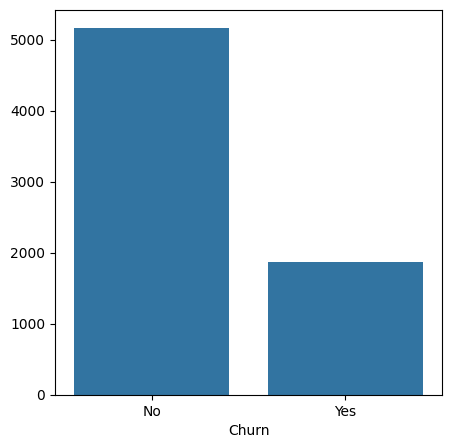

In [14]:
churn_count = df['Churn'].value_counts()
plt.figure(figsize=(5, 5))
sns.barplot(x=churn_count.index , y= churn_count.values)

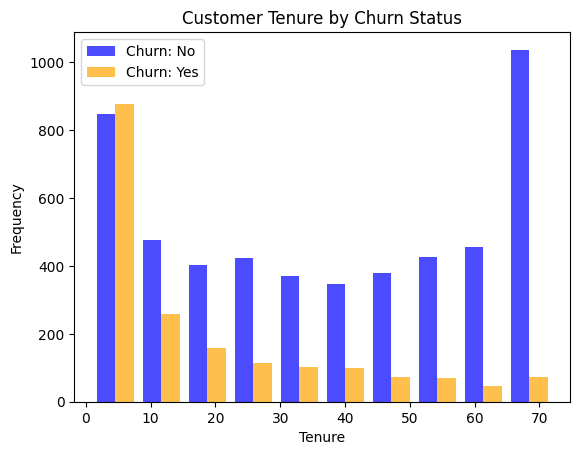

In [15]:
    tenure_churn_no = df[df['Churn'] == 'No']['tenure']
    tenure_churn_yes = df[df['Churn'] == 'Yes']['tenure']
    plt.hist([tenure_churn_no,tenure_churn_yes],bins=10, label=['Churn: No', 'Churn: Yes'], color=['blue', 'orange'], alpha=0.7)
    plt.title('Customer Tenure by Churn Status')
    plt.xlabel('Tenure')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

C:\Users\Lax\AppData\Local\Temp\ipykernel_1904\3255075809.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='viridis')


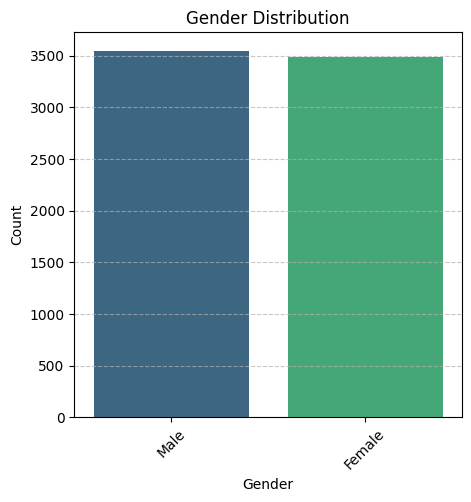

In [16]:
gender_counts = df['gender'].value_counts()
plt.figure(figsize=(5, 5))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='viridis')

plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

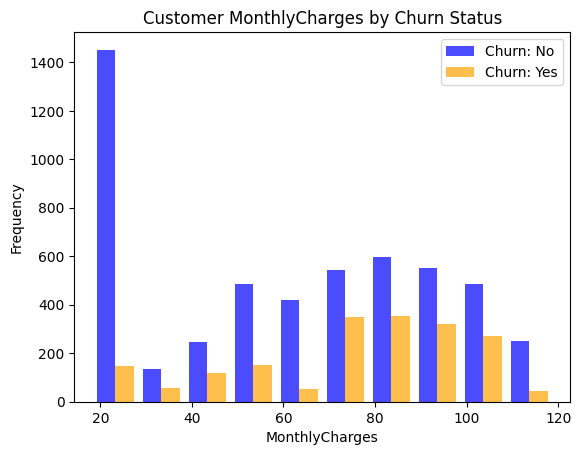

In [17]:
MonthlyCharges_churn_no = df[df['Churn'] == 'No']['MonthlyCharges']
MonthlyCharges_churn_yes = df[df['Churn'] == 'Yes']['MonthlyCharges']
plt.hist([MonthlyCharges_churn_no,MonthlyCharges_churn_yes],bins=10, label=['Churn: No', 'Churn: Yes'], color=['blue', 'orange'], alpha=0.7)
plt.title('Customer MonthlyCharges by Churn Status')
plt.xlabel('MonthlyCharges')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [18]:
for column in df:
    if df[column].dtypes == 'object':
        print(f"{column} : {df[column].unique()}")

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


### Replace the "No internet service"  with simply "No" also the "No phone service"

In [19]:
df.replace('No internet service', 'No',inplace =True)
df.replace('No phone service', 'No',inplace =True)

In [20]:
for column in df:
    if df[column].dtypes == 'object':
        print(f"{column} : {df[column].unique()}")

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


#### we want to convert the string into the integer beacues machine cann't understand the string 
1) we can convert the yes in 1's and no in 0's also for gender column (yes for males and no for females)
2) at last we apply one hot encoder for Contract ,PaymentMethod and InternetService 
#### this all of the above changes made in other copy of original dataset

In [21]:
df1 = df.copy()
yes_no_columns = ['gender',  'Partner', 'Dependents', 
       'PhoneService', 'MultipleLines', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies',  'PaperlessBilling', 
        'Churn']
for colu in yes_no_columns:
    df1[colu].replace({'Yes' : 1 , 'No' : 0} , inplace = True)

In [22]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

In [23]:
df1 = pd.get_dummies(data=df1, columns=['InternetService', 'Contract', 'PaymentMethod'])
df1 = df1.astype(int)

In [24]:
df1


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,1,0,1,1,72,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,1,0,1,1,11,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,0,1,1,0,4,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   gender                                   7032 non-null   int32
 1   SeniorCitizen                            7032 non-null   int32
 2   Partner                                  7032 non-null   int32
 3   Dependents                               7032 non-null   int32
 4   tenure                                   7032 non-null   int32
 5   PhoneService                             7032 non-null   int32
 6   MultipleLines                            7032 non-null   int32
 7   OnlineSecurity                           7032 non-null   int32
 8   OnlineBackup                             7032 non-null   int32
 9   DeviceProtection                         7032 non-null   int32
 10  TechSupport                              7032 non-null   int32
 11  Streaming

In [26]:
colu_to_scaled = ['tenure', 'MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df1[colu_to_scaled] = scaler.fit_transform(df1[colu_to_scaled])

In [27]:
df1.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6641,1,0,0,0,0.211268,1,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
3540,1,0,1,1,1.000000,1,0,1,1,1,...,0,1,0,0,0,1,1,0,0,0
4560,0,0,1,1,0.112676,1,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0
3931,1,0,1,0,0.338028,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
5466,0,0,0,1,0.126761,1,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0


In [28]:
df1.to_csv('cleanedcustomerchurn.csv', index=False)

## Train and test split

In [29]:
X = df1.drop('Churn' , axis = 'columns')
y = df1['Churn']

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [31]:
model = keras.Sequential([
    keras.layers.Dense(26, input_shape = (26,), activation = 'relu'),
    #keras.layers.Dense(13, activation = 'relu'),
    keras.layers.Dense(5, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid'),
])

model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

model.fit(X_train,y_train,epochs = 500)

Epoch 1/500
176/176 [==============================] - 2s 2ms/step - loss: 0.5981 - accuracy: 0.6555
Epoch 2/500
176/176 [==============================] - 0s 2ms/step - loss: 0.4411 - accuracy: 0.7831
Epoch 3/500
176/176 [==============================] - 0s 2ms/step - loss: 0.4263 - accuracy: 0.7941
Epoch 4/500
176/176 [==============================] - 0s 1ms/step - loss: 0.4207 - accuracy: 0.8028
Epoch 5/500
176/176 [==============================] - 0s 1ms/step - loss: 0.4179 - accuracy: 0.8021
Epoch 6/500
176/176 [==============================] - 0s 1ms/step - loss: 0.4149 - accuracy: 0.8032
Epoch 7/500
176/176 [==============================] - 0s 1ms/step - loss: 0.4132 - accuracy: 0.8073
Epoch 8/500
176/176 [==============================] - 0s 1ms/step - loss: 0.4109 - accuracy: 0.8075
Epoch 9/500
176/176 [==============================] - 0s 2ms/step - loss: 0.4099 - accuracy: 0.8075
Epoch 10/500
176/176 [==============================] - 0s 2ms/step - loss: 0.4093 - accura

176/176 [==============================] - 1s 3ms/step - loss: 0.3723 - accuracy: 0.8249
Epoch 82/500
176/176 [==============================] - 1s 3ms/step - loss: 0.3712 - accuracy: 0.8242
Epoch 83/500
176/176 [==============================] - 1s 3ms/step - loss: 0.3711 - accuracy: 0.8281
Epoch 84/500
176/176 [==============================] - 0s 3ms/step - loss: 0.3719 - accuracy: 0.8249
Epoch 85/500
176/176 [==============================] - 0s 3ms/step - loss: 0.3712 - accuracy: 0.8235
Epoch 86/500
176/176 [==============================] - 0s 3ms/step - loss: 0.3715 - accuracy: 0.8220
Epoch 87/500
176/176 [==============================] - 1s 3ms/step - loss: 0.3708 - accuracy: 0.8251
Epoch 88/500
176/176 [==============================] - 0s 3ms/step - loss: 0.3700 - accuracy: 0.8252
Epoch 89/500
176/176 [==============================] - 0s 3ms/step - loss: 0.3709 - accuracy: 0.8258
Epoch 90/500
176/176 [==============================] - 0s 3ms/step - loss: 0.3705 - accuracy: 

176/176 [==============================] - 0s 1ms/step - loss: 0.3520 - accuracy: 0.8340
Epoch 161/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3533 - accuracy: 0.8338
Epoch 162/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3530 - accuracy: 0.8357
Epoch 163/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3517 - accuracy: 0.8311
Epoch 164/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3531 - accuracy: 0.8332
Epoch 165/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3524 - accuracy: 0.8343
Epoch 166/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3538 - accuracy: 0.8309
Epoch 167/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3524 - accuracy: 0.8329
Epoch 168/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3527 - accuracy: 0.8341
Epoch 169/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3517 - a

176/176 [==============================] - 0s 2ms/step - loss: 0.3417 - accuracy: 0.8402
Epoch 240/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3411 - accuracy: 0.8395
Epoch 241/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3413 - accuracy: 0.8379
Epoch 242/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3427 - accuracy: 0.8377
Epoch 243/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3409 - accuracy: 0.8393
Epoch 244/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3394 - accuracy: 0.8380
Epoch 245/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3402 - accuracy: 0.8370
Epoch 246/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3417 - accuracy: 0.8382
Epoch 247/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3409 - accuracy: 0.8407
Epoch 248/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3401 - a

176/176 [==============================] - 0s 3ms/step - loss: 0.3340 - accuracy: 0.8436
Epoch 319/500
176/176 [==============================] - 0s 3ms/step - loss: 0.3344 - accuracy: 0.8405
Epoch 320/500
176/176 [==============================] - 1s 3ms/step - loss: 0.3337 - accuracy: 0.8439
Epoch 321/500
176/176 [==============================] - 0s 3ms/step - loss: 0.3336 - accuracy: 0.8452
Epoch 322/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3340 - accuracy: 0.8400
Epoch 323/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3333 - accuracy: 0.8412
Epoch 324/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3330 - accuracy: 0.8412
Epoch 325/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3335 - accuracy: 0.8402
Epoch 326/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3349 - accuracy: 0.8402
Epoch 327/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3345 - a

176/176 [==============================] - 0s 1ms/step - loss: 0.3291 - accuracy: 0.8393
Epoch 398/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3298 - accuracy: 0.8416
Epoch 399/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3295 - accuracy: 0.8455
Epoch 400/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3285 - accuracy: 0.8444
Epoch 401/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3282 - accuracy: 0.8427
Epoch 402/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3292 - accuracy: 0.8455
Epoch 403/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3283 - accuracy: 0.8402
Epoch 404/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3276 - accuracy: 0.8409
Epoch 405/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3285 - accuracy: 0.8412
Epoch 406/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3287 - a

176/176 [==============================] - 0s 1ms/step - loss: 0.3259 - accuracy: 0.8478
Epoch 477/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3244 - accuracy: 0.8457
Epoch 478/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3260 - accuracy: 0.8466
Epoch 479/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3256 - accuracy: 0.8469
Epoch 480/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3238 - accuracy: 0.8453
Epoch 481/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3249 - accuracy: 0.8450
Epoch 482/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3250 - accuracy: 0.8439
Epoch 483/500
176/176 [==============================] - 0s 2ms/step - loss: 0.3260 - accuracy: 0.8430
Epoch 484/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3245 - accuracy: 0.8443
Epoch 485/500
176/176 [==============================] - 0s 1ms/step - loss: 0.3270 - a

In [32]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 0s 1ms/step - loss: 0.5549 - accuracy: 0.7626


[0.554894745349884, 0.7626155018806458]

In [33]:
y_predict = model.predict(X_test)
y_predict[:5]

44/44 [==============================] - 0s 1ms/step


array([[0.00422152],
       [0.01693125],
       [0.75547975],
       [0.01346067],
       [0.26896322]], dtype=float32)

In [34]:
y_test[:10]

2481    0
6784    0
6125    1
3052    0
4099    0
3223    0
3774    0
3469    0
3420    0
1196    0
Name: Churn, dtype: int32

In [35]:
y_pred = []
for element in y_predict:
    if element > 0.5:
        y_pred.append(1)
    else :
        y_pred.append(0)

In [36]:
y_pred[:10]

[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [37]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1033
           1       0.55      0.56      0.56       374

    accuracy                           0.76      1407
   macro avg       0.70      0.70      0.70      1407
weighted avg       0.76      0.76      0.76      1407



Text(95.72222222222221, 0.5, 'Truth')

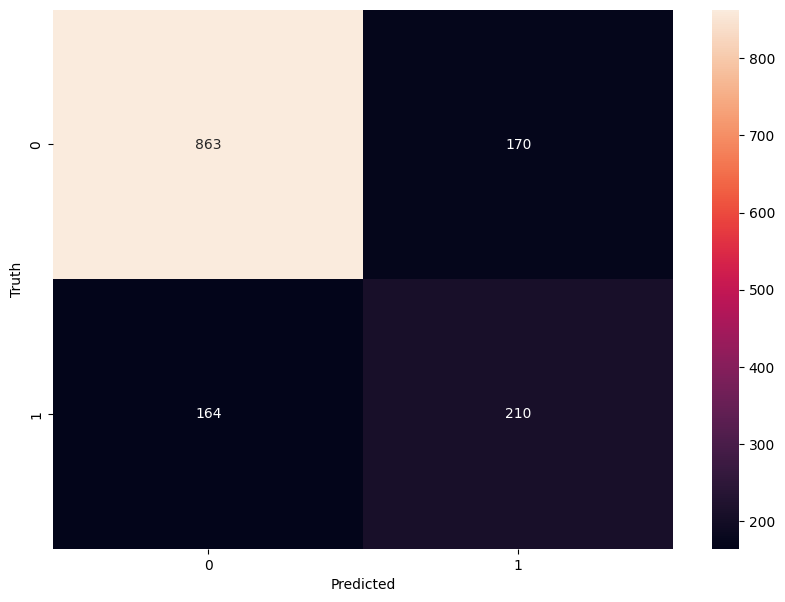

In [38]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')